In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [18]:
df = pd.read_csv('E:/Repos/Census/adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income'])

In [19]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
#checking for 'null' values
df.isnull().values.any()

False

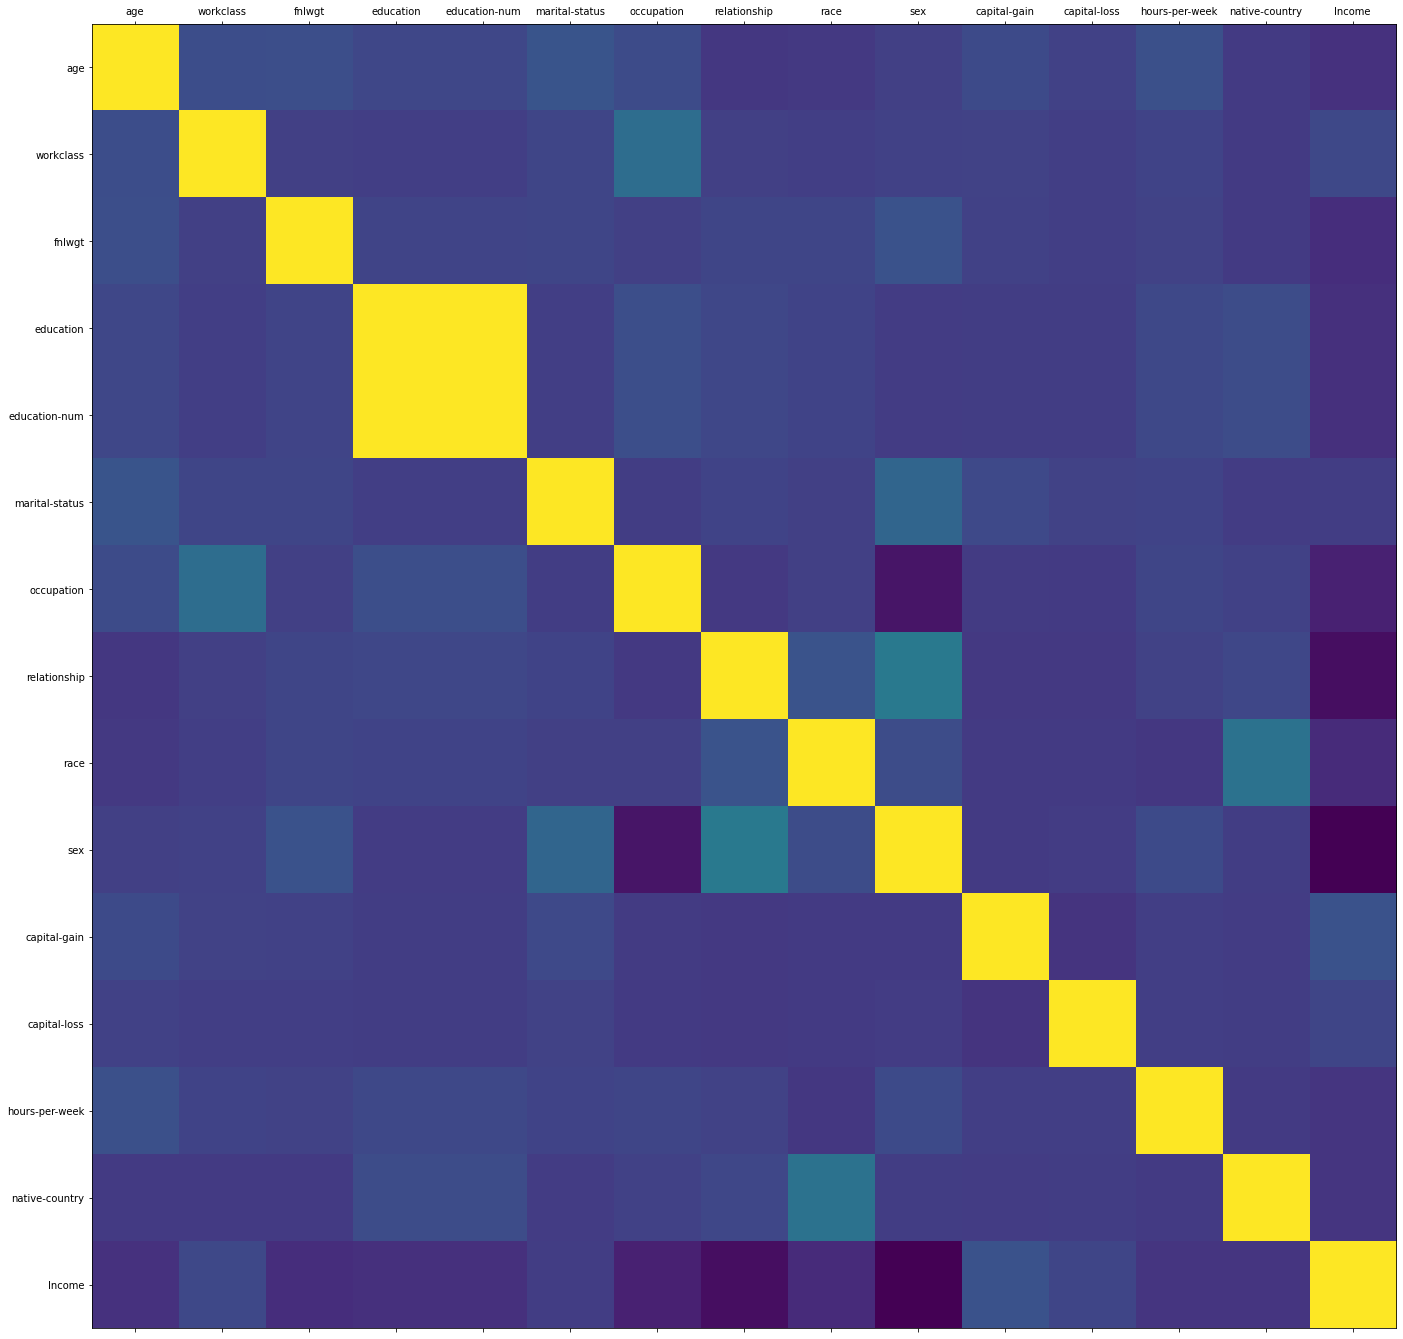

In [21]:
#correlation graph
def plot_corr (df, size=24):
    corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

In [22]:
#correlation matrix
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
age,1.000000,0.071103,0.076682,0.044320,0.044320,0.097691,0.061436,-0.020508,-0.013882,0.013328,0.056664,0.017703,0.080641,-0.010688,-0.044498
workclass,0.071103,1.000000,0.012767,0.011666,0.011666,0.035949,0.217072,0.015524,0.009359,0.019347,0.025639,0.010242,0.030301,-0.010246,0.047203
fnlwgt,0.076682,0.012767,1.000000,0.034911,0.034911,0.037005,0.015411,0.037741,0.036233,0.090497,0.019787,0.011433,0.026265,-0.010298,-0.058700
education,0.044320,0.011666,0.034911,1.000000,1.000000,0.008507,0.074961,0.044319,0.029638,0.000550,0.005438,0.005792,0.046631,0.067619,-0.046218
education-num,0.044320,0.011666,0.034911,1.000000,1.000000,0.008507,0.074961,0.044319,0.029638,0.000550,0.005438,0.005792,0.046631,0.067619,-0.046218
marital-status,0.097691,0.035949,0.037005,0.008507,0.008507,1.000000,0.006524,0.029083,0.012722,0.181870,0.050772,0.022601,0.028753,0.001912,0.002644
occupation,0.061436,0.217072,0.015411,0.074961,0.074961,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.005483,-0.009684,0.039536,0.019578,-0.104691
relationship,-0.020508,0.015524,0.037741,0.044319,0.044319,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.012549,-0.015410,0.025558,0.042444,-0.171294
race,-0.013882,0.009359,0.036233,0.029638,0.029638,0.012722,0.016586,0.096808,1.000000,0.067840,-0.010851,-0.007996,-0.020509,0.241650,-0.067713
sex,0.013328,0.019347,0.090497,0.000550,0.000550,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.011339,-0.001277,0.055507,0.005977,-0.215980


In [23]:
#verifying missing value 
print("# Linhas no dataframe {0}".format(len(df))) 
print("# Linhas missing em age {0}".format(len(df.loc[df['age'] == ' ?']))) 
print("# Linhas missing em workclass {0}".format(len(df.loc[df['workclass'] == ' ?']))) 
print("# Linhas missing em fnlwgt {0}".format(len(df.loc[df['fnlwgt'] == ' ?']))) 
print("# Linhas missing em education {0}".format(len(df.loc[df['education'] == ' ?']))) 
print("# Linhas missing em education-num {0}".format(len(df.loc[df['education-num'] == ' ?']))) 
print("# Linhas missing em occupation {0}".format(len(df.loc[df['occupation'] == ' ?']))) 
print("# Linhas missing em relationships {0}".format(len(df.loc[df['relationship'] == ' ?']))) 
print("# Linhas missing em race {0}".format(len(df.loc[df['race'] == ' ?']))) 
print("# Linhas missing em sex {0}".format(len(df.loc[df['sex'] == ' ?']))) 
print("# Linhas missing em capital-gain {0}".format(len(df.loc[df['capital-gain'] == ' ?']))) 
print("# Linhas missing em hours-per-week {0}".format(len(df.loc[df['hours-per-week'] ==' ?']))) 
print("# Linhas missing em native-country {0}".format(len(df.loc[df['native-country'] == ' ?']))) 


# Linhas no dataframe 32561
# Linhas missing em age 0
# Linhas missing em workclass 1836
# Linhas missing em fnlwgt 0
# Linhas missing em education 0
# Linhas missing em education-num 0
# Linhas missing em occupation 1843
# Linhas missing em relationships 0
# Linhas missing em race 0
# Linhas missing em sex 0
# Linhas missing em capital-gain 0
# Linhas missing em hours-per-week 0
# Linhas missing em native-country 583


In [24]:
#Removing missing values 
df = df[~df['occupation'].isin([' ?'])]
df = df[~df['native-country'].isin([' ?'])]
df = df[~df['workclass'].isin([' ?'])]

In [25]:
df['Income'][32557]

' >50K'

In [26]:
mapping = {' <=50K': 1,' >50K': 0}
df.replace({'Income': mapping}, inplace = True)

In [27]:
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0


In [28]:
#Removing duplicated column 
df = df.drop(['education'], axis=1)

In [31]:
#ussing get_dummies to separate categorical variables
Y = df["Income"]
features = ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
df = pd.get_dummies(df[features])
   

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
#splitting the data 
df_train, df_test, y_train, y_teste = train_test_split(df, Y, test_size=0.25, random_state = 42, shuffle = True)

In [33]:
df_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
234,28,76714,15,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26879,41,178431,9,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
19182,53,290640,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13485,31,215297,9,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9625,34,188682,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,31,197672,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7547,20,141481,7,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
29964,56,235197,9,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31887,36,128876,6,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
24092,28,92262,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27105,49,281647,13,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5426,39,231491,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2448,29,251854,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17409,36,183902,13,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,40,67852,9,0,0,35,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5875,41,120539,10,3103,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
935,37,176900,9,0,0,99,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17056,56,51662,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
#Training RandomForest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rf.fit(df_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [36]:
#Testing the model 
predictions = model_rf.predict(df_test)

print("{0:.4f}".format(metrics.accuracy_score(y_teste, predictions)))

0.8377
